In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=0d6ee6ee28034e02c0edc5262619fdd687ccdab894b2459e12f8226b8ed9fa79
  Stored in directory: c:\users\swayamprabha\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn



In [6]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [7]:
data = pd.read_csv("C:\\Users\\SWAYAMPRABHA\\Desktop\\CreditCard.csv")

In [8]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [9]:
data.shape

(284807, 31)

In [10]:
data = data.sample(frac = 0.2, random_state = 1)
print(data.shape)

(56961, 31)


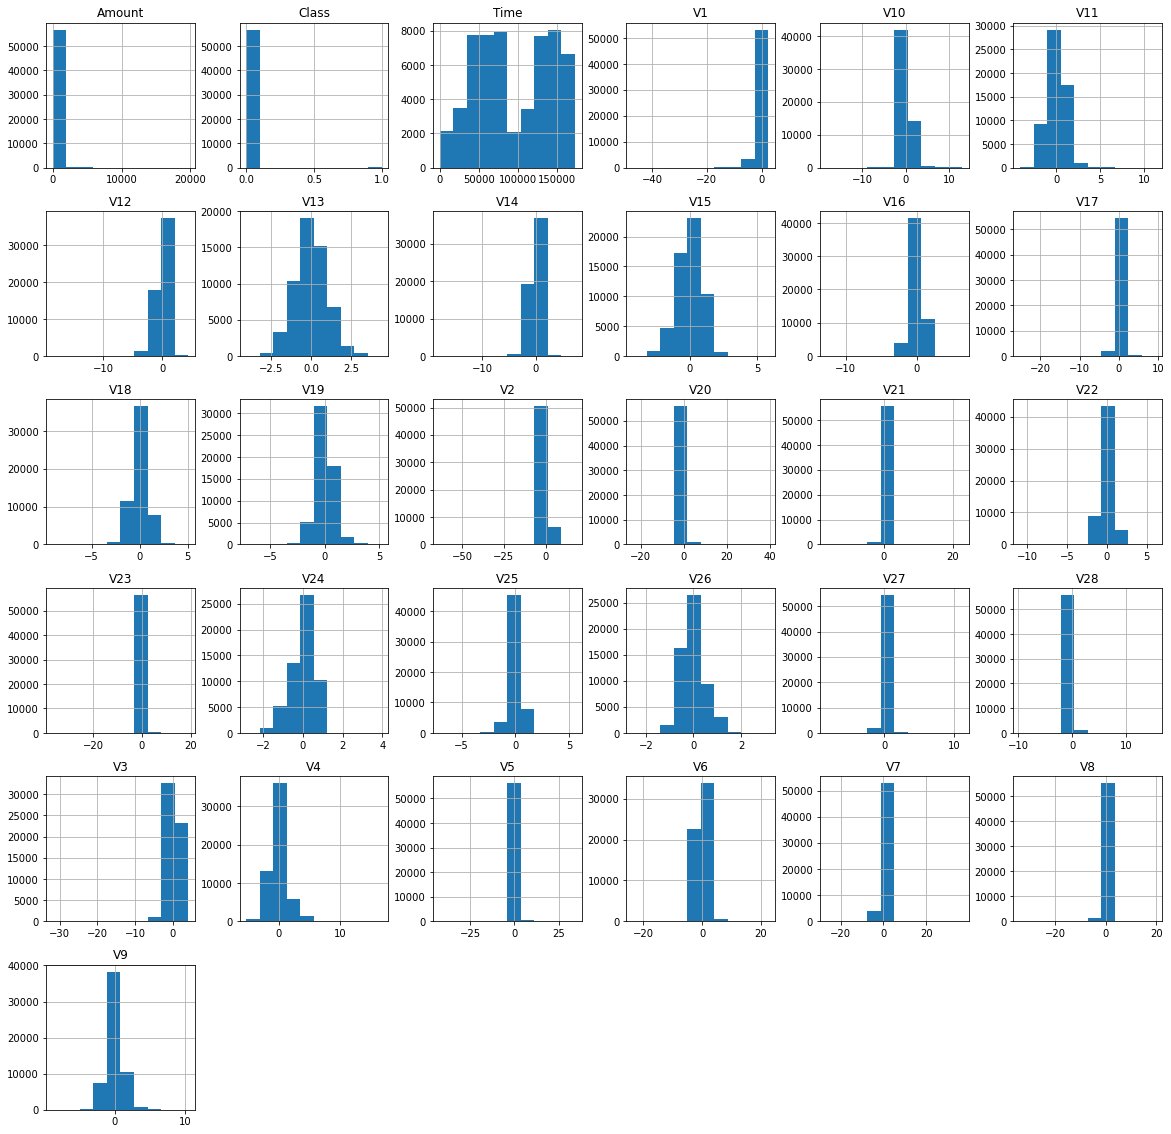

In [11]:
data.hist(figsize = (20,20))
plt.show()

In [13]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)

print('Fraud cases:{}'.format(len(fraud)))
print('Valid cases:{}'.format(len(valid)))

0.0015296972254457222
Fraud cases:87
Valid cases:56874


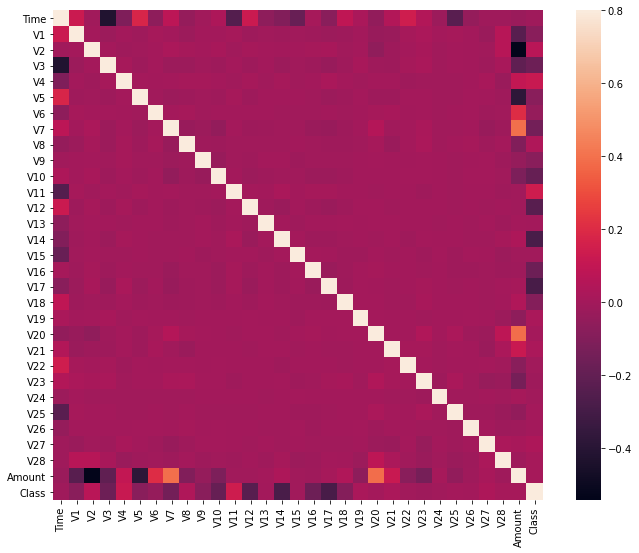

In [15]:
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [16]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['Class']]
target = 'Class'
x = data[columns]
y = data[target]
print(x.shape)
print(y.shape)

(56961, 30)
(56961,)


In [18]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [24]:
state = 1
classifiers = { 'Isolation Forest':IsolationForest(max_samples = len(x),
                                                 contamination  = outlier_fraction,
                                                 random_state = state),
               'Local Outlier Factor':LocalOutlierFactor(n_neighbors = 20,
                                                        contamination = outlier_fraction)
}

In [25]:
n_outliers = len(fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    print('{}:{}'.format(clf_name,n_errors))
    print(accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))
    

Isolation Forest:127
0.997770404311722
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.27      0.28      0.27        87

    accuracy                           1.00     56961
   macro avg       0.64      0.64      0.64     56961
weighted avg       1.00      1.00      1.00     56961

Local Outlier Factor:173
0.9969628342199048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.01      0.01      0.01        87

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

